In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tipo=pd.read_csv("logCT2.csv",index_col=0)
df_tipo

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time
...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time


In [12]:
df_tipo['concept:name'].value_counts().mean()

16.928571428571427

In [11]:
df_tipo.groupby(['Type'])['concept:name'].value_counts()

Type                  concept:name                                                 
Analyze Cycle Time    Calculate cycle time                                             157
                      Identify bottlenecks                                              61
                      Compare cycle time                                                30
                      Calculate waiting time                                            27
                      Calculate throughput                                              18
                      Calculate processing time                                          9
                      Comparative of throughput                                          2
                      Compare waiting time with processing time                          2
                      Analyze cycle time depending on the events                         1
                      Calculate intervals of time of the traces                          1
      

In [35]:
d = df_tipo.groupby(['Type', 'concept:name'])
for n, g in d:
    print(n, len(g['Specific operation'].unique()))

('Analyze Cycle Time', 'Analyze cycle time depending on the events') 1
('Analyze Cycle Time', 'Calculate cycle time') 13
('Analyze Cycle Time', 'Calculate intervals of time of the traces') 1
('Analyze Cycle Time', 'Calculate processing time') 1
('Analyze Cycle Time', 'Calculate throughput') 1
('Analyze Cycle Time', 'Calculate waiting time') 1
('Analyze Cycle Time', 'Comparative of throughput') 1
('Analyze Cycle Time', 'Compare cycle time') 1
('Analyze Cycle Time', 'Compare processing time') 1
('Analyze Cycle Time', 'Compare waiting time with processing time') 1
('Analyze Cycle Time', 'Identify bottlenecks') 5
('Calculate statistics', 'Calculate average of activities per trace') 1
('Calculate statistics', 'Calculate frequency') 7
('Calculate statistics', 'Calculate number of elements') 7
('Calculate statistics', 'Calculate percentages') 4
('Calculate statistics', 'Calculate statistics') 4
('Identification', 'Identify activities') 4
('Identification', 'Identify attributes') 3
('Identific

In [21]:
df_tipo['concept:name'].value_counts().mean()

16.928571428571427

In [25]:
df_tipo['concept:name'].value_counts().head(16)

Calculate cycle time            157
Filter traces                    83
Calculate number of elements     76
Identify bottlenecks             61
Group traces                     58
Calculate percentages            55
Represent process map            47
Represent bar charts             36
Calculate statistics             35
Identify attributes              34
Represent histograms             32
Compare cycle time               30
Calculate waiting time           27
Represent temporal series        25
Calculate frequency              23
Calculate throughput             18
Name: concept:name, dtype: int64

(array([5., 4., 3., 1., 2., 0., 0., 0., 0., 1.]),
 array([ 18. ,  31.9,  45.8,  59.7,  73.6,  87.5, 101.4, 115.3, 129.2,
        143.1, 157. ]),
 <a list of 10 Patch objects>)

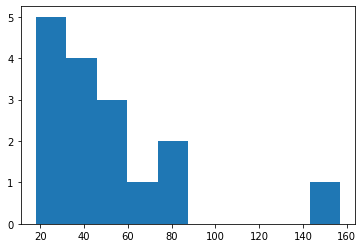

In [28]:
plt.hist(df_tipo['concept:name'].value_counts().head(16))

In [14]:
df_tipo['Specific operation'].value_counts().head(10)

                                                                             161
Filter traces by activities                                                   44
Calculate percentage of traces                                                42
Identify activities as bottlenecks applying temporal performance criteria     40
Calculate number of traces                                                    39
Represent process map with cycle time                                         35
Represent histograms of cycle time                                            29
Identify values of attributes                                                 21
Group traces depending on attributes                                          21
Calculate cycle time of the whole process for all traces                      21
Name: Specific operation, dtype: int64

In [37]:
df_tipo['Specific operation'].unique()

array(['Calculate cycle time of the whole process for all traces', ' ',
       'Get cycle time from the previous question',
       'Calculate cycle time of only a subset of pairs of events for all traces',
       'Calculate Statistics of cycle time',
       'Represent histograms of cycle time',
       'Calculate cycle time of a fragment of the process for all traces',
       'Calculate number of traces', 'Calculate number of activities',
       'Calculate percentage of traces',
       'Calculate Statistics of attributes',
       'Group traces depending on attributes',
       'Represent histograms of attributes',
       'Represent bar charts of traces', 'Filter traces by activities',
       'Filter activities by sub-processes',
       'Group activities by sub-processes',
       'Calculate cycle time for all pairs of events for each subset of traces',
       'Group activities by role', 'Group activities by time',
       'Represent process map with cycle time',
       'Calculate cycle tim

###  Variantes del top 5 Operaciones más frecuentes

In [5]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate cycle time']['Specific operation'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate cycle time']['Specific operation'].value_counts().mean())

Calculate cycle time of the whole process for all traces                              21
Calculate cycle time of a fragment of the process for a subset of traces              20
Calculate cycle time of the whole process for each subset of traces                   19
Calculate cycle time of the whole process for a subset of traces                      17
Calculate cycle time for all pairs of events for all traces                           16
Get cycle time from the previous question                                             13
Calculate cycle time of only a subset of pairs of events for a subset of traces        9
Calculate cycle time for all pairs of events for a subset of traces                    8
Calculate cycle time of a fragment of the process for all traces                       8
Calculate cycle time for all pairs of events for each subset of traces                 8
Calculate cycle time of only a subset of pairs of events for each subset of traces     7
Calculate cycle time 

In [6]:
print(df_tipo[df_tipo['concept:name'] == 'Filter traces']['Specific operation'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Filter traces']['Specific operation'].value_counts().mean())

Filter traces by activities                           44
Filter traces by attributes                           15
Filter traces by cycle time                            8
Filter traces by frequency                             7
Filter traces by year                                  6
Filter traces depending on the order of activities     2
Filter traces by subprocesses                          1
Name: Specific operation, dtype: int64
11.857142857142858


In [8]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate number of elements']['Specific operation'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate number of elements']['Specific operation'].value_counts().mean())

Calculate number of traces                            39
Calculate number of activities                        14
Calculate number of events                            10
Calculate number of sub-processes                      5
Calculate number of variants                           4
Calcute number of values of an attribute               3
Calculate number of different organizational units     1
Name: Specific operation, dtype: int64
10.857142857142858


In [9]:
print(df_tipo[df_tipo['concept:name'] == 'Identify bottlenecks']['Specific operation'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Identify bottlenecks']['Specific operation'].value_counts().mean())

Identify activities as bottlenecks applying temporal performance criteria                             40
Identify sub-processes as bottlenecks applying temporal performance criteria                          11
Identify organizational units as bottlenecks applying temporal performance criteria                    5
Identify sub-processes with incorrect orders with respect to the happy path as bottlenecks             4
Identify activities as bottlenecks applying temporal performance criteria and statistical measures     1
Name: Specific operation, dtype: int64
12.2


In [10]:
print(df_tipo[df_tipo['concept:name'] == 'Group traces']['Specific operation'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Group traces']['Specific operation'].value_counts().mean())

Group traces depending on attributes                      21
Group traces by activities                                17
Group traces by year                                       5
Group traces by cycle time                                 4
Group traces by sub-processes                              2
Group traces by resources                                  2
Group traces by month                                      2
Group traces by waiting                                    1
Group traces according to the repetition of activities     1
Group traces by organizational units                       1
Group traces by roles                                      1
Group traces by endpoints                                  1
Name: Specific operation, dtype: int64
4.833333333333333


### Análisis de variantes

In [3]:
v = df_tipo.groupby(by=['concept:name'])
variantes = v.apply(lambda x: len(x["Specific operation"].unique()))

In [57]:
variantes.sort_values()

concept:name
Analyze cycle time depending on the events                        1
Represent scatterplot                                             1
Group events by time                                              1
Group organizational units                                        1
Group sub-processes                                               1
Identify impact of bottlenecks by organizational unit             1
Identify specific subprocesses                                    1
Identify traces by cycle time                                     1
Identify transitions by cycle time                                1
Preprocess the events of the logs                                 1
Preprocess the traces of the logs                                 1
Represent boxplots of cycle time                                  1
Represent circular charts of attributes of the traces             1
Represent correlation graph of variables                          1
Represent density of cycle time    

(array([35.,  2.,  5.,  7.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.]),
 array([ 0.5       ,  1.46428571,  2.42857143,  3.39285714,  4.35714286,
         5.32142857,  6.28571429,  7.25      ,  8.21428571,  9.17857143,
        10.14285714, 11.10714286, 12.07142857, 13.03571429, 14.        ]),
 <a list of 14 Patch objects>)

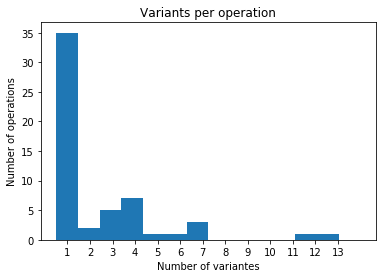

In [7]:
fig, ax = plt.subplots()
# ax.axis("off")
plt.title('Variants per operation')
plt.xlabel('Number of variantes')
plt.ylabel('Number of operations')
plt.xticks(np.arange(1, 14, 1.0))
plt.hist(variantes, 14, range=[0.5, 14])


In [39]:
df_tipo['Specific operation'].value_counts().mean()

9.028571428571428

In [42]:
df_tipo['Specific operation'].value_counts().head(25)

                                                                                161
Filter traces by activities                                                      44
Calculate percentage of traces                                                   42
Identify activities as bottlenecks applying temporal performance criteria        40
Calculate number of traces                                                       39
Represent process map with cycle time                                            35
Represent histograms of cycle time                                               29
Identify values of attributes                                                    21
Calculate cycle time of the whole process for all traces                         21
Group traces depending on attributes                                             21
Calculate cycle time of a fragment of the process for a subset of traces         20
Calculate cycle time of the whole process for each subset of traces         